In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from konlpy.utils import partition
import re

# 데이터 가져오기

In [2]:
train=pd.read_csv('data/train.hate.csv')

In [3]:
test=pd.read_csv('data/test.hate.no_label.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7896 entries, 0 to 7895
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comments  7896 non-null   object
 1   label     7896 non-null   object
dtypes: object(2)
memory usage: 123.5+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comments  974 non-null    object
dtypes: object(1)
memory usage: 7.7+ KB


In [6]:
total=pd.concat([train,test])  #7896:

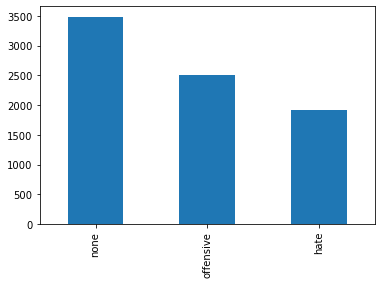

In [7]:
total['label'].value_counts()
total['label'].value_counts().plot(kind='bar')

In [8]:
total['label_band']=total['label'].map({'none':0,'offensive':1,'hate':2})

In [9]:
train.head()

,comments,label
0,(현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...,hate
1,....한국적인 미인의 대표적인 분...너무나 곱고아름다운모습...그모습뒤의 슬픔을...,none
2,"...못된 넘들...남의 고통을 즐겼던 넘들..이젠 마땅한 처벌을 받아야지..,그래...",hate
3,"1,2화 어설펐는데 3,4화 지나서부터는 갈수록 너무 재밌던데",none
4,1. 사람 얼굴 손톱으로 긁은것은 인격살해이고2. 동영상이 몰카냐? 메걸리안들 생각...,hate


# 데이터 전처리

In [10]:
wordDict={"[\W+]":" ",'[\d+]':' ','[ㅡ+]':' ','[ㅠ+]':' ','[ㅜ+]':' ','[ㄱ-ㅎ]':' '}

In [11]:
for i,j in wordDict.items():
    total['comments']=total.comments.str.replace(i,j)

In [12]:
def cw(x):
    simdict={'힘내소|힘내라|힘내세요|힘내시고|힘내요|힘내세용|힘내서':'힘내다',
            '힘드네요|힘든|힘든데|힘들|힘내요|힘들게|힘들겠다|힘들다|힘들다고|힘들면|힘들어|힘들지|힘들다면':'힘들다',
            '멋있고|멋있는|멋있다|멋있어요':'멋있다',
            '멋져|멋져요|멋지고|멋지다|멋진|멋집니다':'멋지다',
            '같고|같기도|같긴|같긴한데|같냐|같네|같네요|같다|같다는|같더라|같던데|같습니다|같아|같아서같아요|같았음|같어|같으니|같으면|같은|같은거|같은건|같은대|같은데|같은데요|같음|같이|같지|같지도|같긴|같긴한데|같냐|같네|같네요|같다|같다는|같더라|같던데|같습니다|같아|같아서|같아요|같았음|같어|같으니|같으면|같은|같은거|같은건|같은대|같은데|같은데요|같음|같이|같지|같지도':'같다',
            '궁굼|궁금|궁금한데|궁금해|궁금했는데':'궁금하다',
            '추카':'축하'}
    for index,word in simdict.items():
        return re.sub(index,word,x)
    

In [13]:
total['comments']=total.comments.apply(cw)

### 문자=> 숫자 (단어 길이와 빈도수를 조절)

In [14]:
n=2  #단어 길이
m=3  # 빈도수

In [15]:
okt=Okt()
wordList=[]
word_index={}
wordCount={}
total['corpus']=0
for index ,sentencs in enumerate(total.comments):
    words=okt.morphs(sentencs)
    total['corpus'].iloc[index]=words
    for word in words:
        if len(word) >=n:
            if word not in wordList:
                wordCount[word]=1
                wordList.append(word)
            else:
                wordCount[word]=wordCount[word]+1
wordList=[]                
for words in total['corpus']:
    for word in words:
        if len(word) >=n:
            if wordCount[word] >= m:
                if word not in wordList:
                    word_index[word]=len(wordList)
                    wordList.append(word)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [16]:
total

,comments,label,label_band,corpus
0,현재 호텔주인 심정 아 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...,hate,2.0,"[현재, 호텔, 주인, 심정, 아, 난, 마른하늘, 에, 날벼락, 맞고, 호텔, 망..."
1,한국적인 미인의 대표적인 분 너무나 곱고아름다운모습 그모습뒤의 슬픔을...,none,0.0,"[한국, 적, 인, 미인, 의, 대표, 적, 인, 분, 너무나, 곱, 고, 아름다운..."
2,못된 넘들 남의 고통을 즐겼던 넘들 이젠 마땅한 처벌을 받아야지 그래...,hate,2.0,"[못, 된, 넘, 들, 남, 의, 고통, 을, 즐겼던, 넘, 들, 이, 젠, 마땅한..."
3,화 어설펐는데 화 지나서부터는 갈수록 너무 재밌던데,none,0.0,"[화, 어설펐는데, 화, 지나서부터는, 갈수록, 너무, 재밌던데]"
4,사람 얼굴 손톱으로 긁은것은 인격살해이고 동영상이 몰카냐 메걸리안들 생각...,hate,2.0,"[사람, 얼굴, 손톱, 으로, 긁은것은, 인격, 살해, 이고, 동영상, 이, 몰카,..."
...,...,...,...,...
969,대박 게스트 꼭 봐야징 컨셉이 바뀌니깐 재미지넹,NaN,NaN,"[대박, 게스트, 꼭, 봐야, 징, 컨셉, 이, 바뀌니깐, 재미, 지, 넹]"
970,성형으로 다 뜯어고쳐놓고 예쁜척 성형 전 니 얼굴 다 알고있다 순자처럼 된장냄새...,NaN,NaN,"[성형, 으로, 다, 뜯어, 고쳐놓고, 예쁜, 척, 성형, 전, 니, 얼굴, 다, ..."
971,분위기는 비슷하다만 전혀다른 전개던데 무슨 우리나라사람들은 분위기만 비슷하면 ...,NaN,NaN,"[분위기, 는, 비슷하다만, 전혀, 다른, 전개, 던데, 무슨, 우리나라, 사람, ..."
972,입에 손가릭이 개 있으니 징그럽다,NaN,NaN,"[입, 에, 손가릭, 이, 개, 있으니, 징그럽다]"


In [17]:
print(sorted(word_index.keys()))

['BTS', 'JTBC', 'KBS', 'OOO', 'SM', 'SNS', 'TV', 'YG', 'aoa', 'bj', 'bts', 'bye', 'cf', 'com', 'god', 'https', 'jk', 'jyp', 'kbs', 'kg', 'mbc', 'mc', 'pd', 'sbs', 'sm', 'sns', 'to', 'tv', 'vs', 'xx', 'yg', 'ᆢᆢ', '가가', '가게', '가격', '가고', '가관', '가기', '가끔', '가나', '가난한', '가냐', '가네', '가는', '가는거', '가는건', '가는게', '가는데', '가능성', '가능한', '가니', '가도', '가득', '가득한', '가든', '가라', '가로세로', '가루', '가르치는', '가리는', '가만', '가만히', '가면', '가벼운', '가볍게', '가보', '가보네', '가볼', '가봐', '가봐도', '가봐라', '가봤을', '가사', '가서', '가세', '가수', '가스', '가슴', '가시길', '가식', '가야', '가왜', '가요', '가요무대', '가운데', '가자', '가장', '가정', '가정사', '가져라', '가족', '가즈', '가지', '가지가지', '가진', '가짜', '가치', '가치관', '가해자', '각자', '간건', '간다', '간만', '간이', '간지', '갈듯', '갈라', '갈수', '갈수록', '갈아', '갈지', '감당', '감독', '감동', '감방', '감사합니다', '감성', '감옥', '감은', '감정', '감정이입', '감탄', '감흥', '감히', '갑니다', '갑다', '갑자기', '갑질', '갔네', '갔는데', '갔다', '갔다가', '갔다고', '갔어', '갔으면', '갔을', '강간', '강남', '강동구', '강동원', '강성훈', '강소라', '강아지', '강요', '강용석', '강은비', '강제', '강조', '강지환', '강타', '강하게', '강하늘', '강한나', '강호동', '갖

### Document Term Matrix

In [18]:
totalarray=[]
for corpus in total.corpus:
    temp=[0]*len(word_index)
    for word in corpus:
        if word in word_index.keys():
            temp[word_index[word]]=+1
    totalarray.append(temp)

In [19]:
dtm=pd.DataFrame(totalarray,columns=word_index.keys())

In [20]:
dtm.shape

(8870, 5132)

### one hot encoding

In [21]:
totalarray=[]
for corpus in total.corpus:
    temp=[0]*len(word_index)
    for word in corpus:
        if word in word_index.keys():
            temp[word_index[word]]=1
    totalarray.append(temp)

In [22]:
ohe=pd.DataFrame(totalarray,columns=word_index.keys())

In [23]:
ohe.shape

(8870, 5132)

In [24]:
ohe.iloc[:7896].values

array([[True, True, True, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [25]:
xTrain=ohe.iloc[:7896].to_numpy()
xTest=ohe.iloc[7896:].to_numpy()
yTrain=total['label_band'].iloc[:7896].to_numpy()

In [26]:
print(type(xTrain))
print(type(xTest))
print(type(yTrain))
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(7896, 5132)
(974, 5132)
(7896,)


In [27]:
from sklearn.naive_bayes import CategoricalNB

In [28]:
model=CategoricalNB()
model.fit(xTrain, yTrain)

CategoricalNB()

In [29]:
pred=model.predict(xTest)

IndexError: index 1 is out of bounds for axis 1 with size 1

In [ ]:
pred

In [ ]:
xTest[0].shape

In [ ]:
xTrain[0].shape